######The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Txy and xy Diagrams for Binary Mixtures

This [IPython notebook](http://ipython.org/notebook.html) illustrates the use of Raoult's Law and Antoine's equations to calculate Txy and xy diagrams for binary mixtures. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

In [3]:
#Initializations
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

## Introduction

For a binary mixture at a fixed pressure, the temperature/composition (Tx) diagram plots the equilibrium composition of the liquid and vapor as a function of temperature.  

<div style="margin-top:12px;margin-bottom:0px">
<iframe width="420" height="315" src="//www.youtube.com/embed/-XcTEknC9Aw" frameborder="0" allowfullscreen></iframe>
</div>

## Analysis

The basic calculations start with Raoult's law

$$P = x_A P_A^{sat}(T) + x_B P_A^{sat}(T)$$

substituting $x_B = 1-x_A$

$$P = x_A P_A^{sat}(T) + (1-x_A) P_B^{sat}(T)$$

then solving for $x_A$ and $y_A$

$$x_A = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}$$

$$y_A = x_A\frac{P_A^{sat}(T)}{P}$$

## Plotting the Txy Diagram

The calculations in this notebook are for a representative system of two components, acetone and ethanol. We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

In [1]:
# Antoine's equations
A = 'acetone'
B = 'ethanol'

def PsatA(T):
    return 10**(7.02447 - 1161.0/(T + 224))

def PsatB(T):
    return 10**(8.04494 - 1554.3/(T + 222.65))

Initialize the IPython workspace with with default settings for plots.

In [2]:
pylab.rcParams['figure.figsize'] = (10,6)
pylab.rcParams['font.size'] = 12
pylab.rcParams['lines.linewidth'] = 1.6

For convenience, we create a function that computes the boiling of a pure component given the operating pressure and a function to compute the pure component saturation pressure.

In [3]:
from scipy.optimize import fsolve

def Tboil(Psat,P):
    return fsolve(lambda T: Psat(T) - P,100)[0]

print "Normal boiling  point of {:s} is {:4.1f} deg C".format(A,Tboil(PsatA,760))
print "Normal boiling point of {:s} is {:4.1f} deg C".format(B,Tboil(PsatB,760))

Normal boiling  point of acetaldehyde is 22.4 deg C
Normal boiling point of ethanol is 78.3 deg C


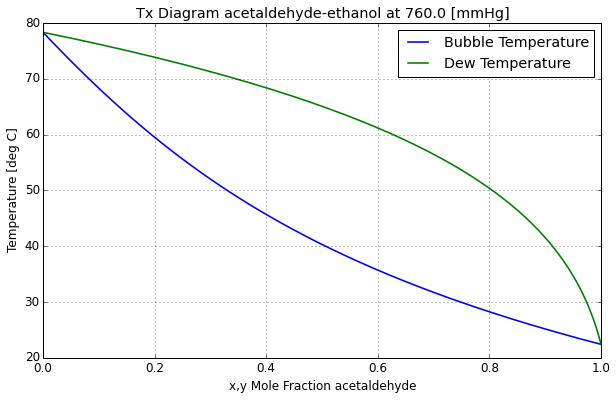

In [4]:
P = 760

T = linspace(Tboil(PsatA,P),Tboil(PsatB,P))

def xA(T):
    return (P - PsatB(T))/(PsatA(T)-PsatB(T))

def yA(T):
    return xA(T)*PsatA(T)/P

plot(map(xA,T),T,map(yA,T),T)
title('Tx Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
legend(['Bubble Temperature','Dew Temperature'],loc='best')
ylabel('Temperature [deg C]')
xlabel('x,y Mole Fraction {:s}'.format(A))
xlim(0,1)
grid();

## xy Diagram

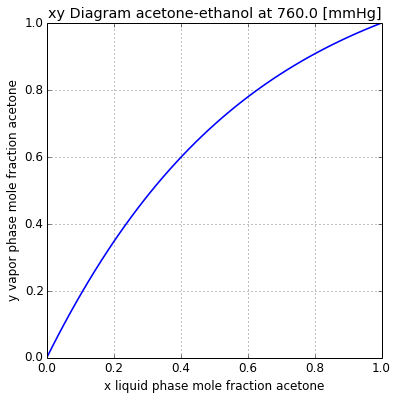

In [46]:
figure(figsize=(6,6))

plot(map(xA,T),map(yA,T))
axis('equal')
title('xy Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
xlabel('x liquid phase mole fraction {:s}'.format(A))
ylabel('y vapor phase mole fraction {:s}'.format(A))
xlim(0,1)
ylim(0,1)
grid();

## Lever Rule

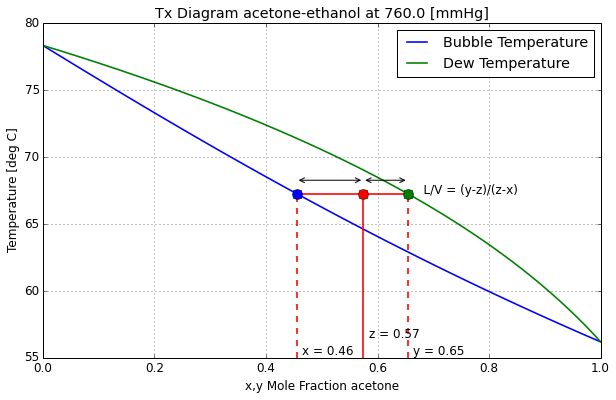

In [90]:
P = 760

T = linspace(Tboil(PsatA,P),Tboil(PsatB,P))

def xA(T):
    return (P - PsatB(T))/(PsatA(T)-PsatB(T))

def yA(T):
    return xA(T)*PsatA(T)/P

plot(map(xA,T),T,map(yA,T),T)
title('Tx Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
legend(['Bubble Temperature','Dew Temperature'],loc='best')
ylabel('Temperature [deg C]')
xlabel('x,y Mole Fraction {:s}'.format(A))
xlim(0,1)
grid();

Te = mean(T)
xe = xA(Te)
ye = yA(Te)
ze = 0.4*xe + 0.6*ye

ax = axis()
plot([ze,ze],[ax[2],Te],'r')
plot([xe,ye],[Te,Te],'r')
plot([xe,xe],[ax[2],Te],'r--',[ye,ye],[ax[2],Te],'r--')

text(xe+0.01,ax[2]+0.2,'x = {:.2}'.format(xe))
text(ye+0.01,ax[2]+0.2,'y = {:.2}'.format(ye))
text(ze+0.01,ax[2]+1.5,'z = {:.2}'.format(ze))

annotate('', (xe,Te+1), (ze,Te+1), arrowprops={'arrowstyle':'<->'})
annotate('', (ze,Te+1), (ye,Te+1), arrowprops={'arrowstyle':'<->'})

annotate('    L/V = (y-z)/(z-x)',(ye,Te))

plot(xe,Te,'bo',ms = 10)
plot(ye,Te,'go',ms = 10)
plot(ze,Te,'ro',ms = 10)


## Exercises

1. Modify this notebook to create Txy and xy diagrams for an acetaldehyde/ethanol mixture.  Create an x-y diagram, and compare to the experimental data avaiable here:

S. G. D'Avila and R. S. F. Silva, "Isothermal vapor-liquid equilibrium data by total pressure method. Systems acetaldehyde-ethanol, acetaldehyde-water, and ethanol-water," Journal of Chemical & Engineering Data, vol. 15 (3), 421-424, 1970.